# First Step - Data Processing

First we need to load the data from our data folder


In [3]:
import pandas as pd
file_path = "Data/Train_data.csv"
df = pd.read_csv(file_path)

print(df.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


# Second Step - Data Processing

The data contains categorical features which is not compatible with machine learning models. We need all numbers. 
Line 3 finds the columns that will need to be encoded, and the applies the transformation 

In [33]:
from sklearn.preprocessing import LabelEncoder

categorial_columns = df.select_dtypes(include='object').columns

for col in categorial_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
    
print(df.head)
print(df.shape[1])

<bound method NDFrame.head of        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       19     9        491          0     0   
1             0              2       41     9        146          0     0   
2             0              1       46     5          0          0     0   
3             0              1       22     9        232       8153     0   
4             0              1       22     9        199        420     0   
...         ...            ...      ...   ...        ...        ...   ...   
25187         0              1       16     2          0          0     0   
25188         0              1       19     9        334          0     0   
25189         0              1       46     1          0          0     0   
25190         0              1       38     5          0          0     0   
25191         0              1       17     5          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_

# Third Step - Data Prep
Now that the data is encoded (doesn't include categorical values) it's time to create the split for the X and Y train and test. X will contain all features of the data EXCEPT FOR THE PREDICTED COLUMN. Which in this case is class. If we trained with the predicted column it would just look at that column to make the prediction, not possible in a real scenario. Just think X is values that we need to predict Y and Y is if that X data is abnormal. 1 is normal 0 is anomaly.

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fourth step - Fitting the model
Initialize the model with baseline hyperparamaters of n_estimators, random_state and max_depth

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_m = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=None)

rf_m.fit(X_train, y_train)   

RandomForestClassifier(random_state=42)

# Fifth step - Predictions
This has the model make predictions, compares them to the actual vs predicted values, and outputs metrics to evaluate performance 

Accuracy: 0.9978170271879341
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



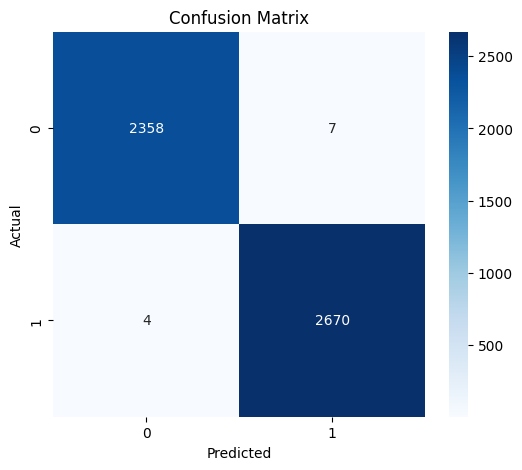

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = rf_m.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# Let's take it back to step 4 - Fitting the Model
The results above were accomplished using a Random Forest model. This creates multiple decision trees independently with each tree getting a random subset of data and features. Let's use a different, more advanced model called XGBoost. This creates trees sequentially, where each tree learns from the previous one's mistake. This initializes the model with some basic parameters. 

In [37]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

# Fifth step - Predictions
We run the same predictions and accuracy metrics. We do see an improvement 

Accuracy: 0.9984123834094066
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



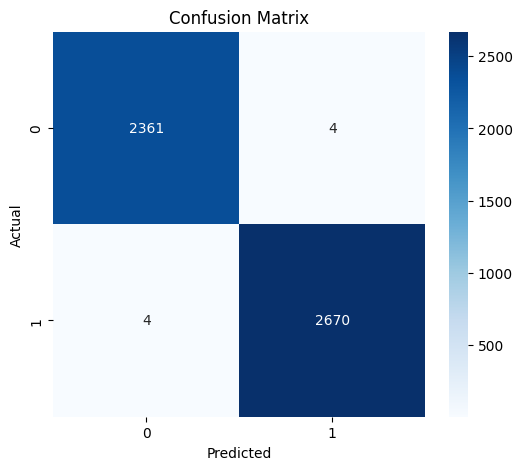

In [38]:
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [39]:
import numpy as np

# Get feature importance scores
feature_importance = xgb_model.feature_importances_
features = X.columns

# Sort and display
sorted_indices = np.argsort(feature_importance)[::-1]

print("\nTop 10 Important Features:")
for i in sorted_indices[:10]:  # Show top 10
    print(f"{features[i]}: {feature_importance[i]:.4f}")



Top 10 Important Features:
src_bytes: 0.3581
protocol_type: 0.1071
hot: 0.0742
count: 0.0720
diff_srv_rate: 0.0574
dst_host_same_src_port_rate: 0.0437
dst_host_srv_count: 0.0362
dst_bytes: 0.0300
logged_in: 0.0217
dst_host_srv_diff_host_rate: 0.0208


In [40]:
# Sort by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importances = feature_importance[sorted_indices]
sorted_features = features[sorted_indices]

# Compute cumulative importance
cumulative_importance = np.cumsum(sorted_importances)

# Select features contributing to 95% of total importance
selected_features = sorted_features[cumulative_importance <= 0.95]

print("Selected Features (95% Importance):", selected_features.tolist())
print("Number of Selected Features:", len(selected_features))


Selected Features (95% Importance): ['src_bytes', 'protocol_type', 'hot', 'count', 'diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_count', 'dst_bytes', 'logged_in', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'srv_count', 'root_shell', 'flag', 'service', 'dst_host_serror_rate', 'dst_host_same_srv_rate', 'duration', 'dst_host_rerror_rate', 'dst_host_diff_srv_rate']
Number of Selected Features: 20


In [41]:
# Keep only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model with fewer features
xgb_model_selected = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy: 0.9984123834094066
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



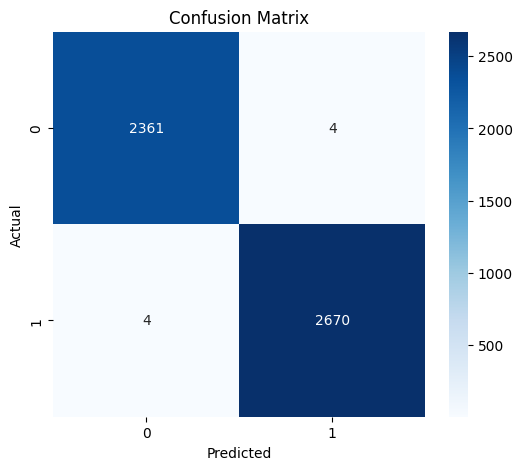

False


In [42]:
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
first_accuracy = 0.9984123834094066
print(accuracy_score(y_test, y_pred)>first_accuracy)

In [44]:
from sklearn.preprocessing import StandardScaler
import torch
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize input data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Make y 2D
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)    # Make y 2D


In [45]:
import torch.nn as nn
class IntrusionDetectionNN(nn.Module):
    def __init__(self, input_size):
        super(IntrusionDetectionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)  # Output layer (Binary classification)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))  # Sigmoid for binary classification
        return x


In [59]:
import torch.optim as optim

# Initialize model
input_size = X_train.shape[1]  # Number of features
model = IntrusionDetectionNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train_tensor)
    
    # Compute loss
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:  # Print loss every 5 epochs
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [5/1000], Loss: 0.6481
Epoch [10/1000], Loss: 0.5122
Epoch [15/1000], Loss: 0.2748
Epoch [20/1000], Loss: 0.1493
Epoch [25/1000], Loss: 0.1375
Epoch [30/1000], Loss: 0.1205
Epoch [35/1000], Loss: 0.1002
Epoch [40/1000], Loss: 0.0890
Epoch [45/1000], Loss: 0.0841
Epoch [50/1000], Loss: 0.0772
Epoch [55/1000], Loss: 0.0715
Epoch [60/1000], Loss: 0.0660
Epoch [65/1000], Loss: 0.0609
Epoch [70/1000], Loss: 0.0560
Epoch [75/1000], Loss: 0.0508
Epoch [80/1000], Loss: 0.0451
Epoch [85/1000], Loss: 0.0400
Epoch [90/1000], Loss: 0.0355
Epoch [95/1000], Loss: 0.0319
Epoch [100/1000], Loss: 0.0291
Epoch [105/1000], Loss: 0.0267
Epoch [110/1000], Loss: 0.0248
Epoch [115/1000], Loss: 0.0233
Epoch [120/1000], Loss: 0.0220
Epoch [125/1000], Loss: 0.0209
Epoch [130/1000], Loss: 0.0200
Epoch [135/1000], Loss: 0.0191
Epoch [140/1000], Loss: 0.0184
Epoch [145/1000], Loss: 0.0177
Epoch [150/1000], Loss: 0.0170
Epoch [155/1000], Loss: 0.0163
Epoch [160/1000], Loss: 0.0157
Epoch [165/1000], Loss: 0.01

Neural Network Accuracy: 0.9956340543758683
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2349
         1.0       0.99      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



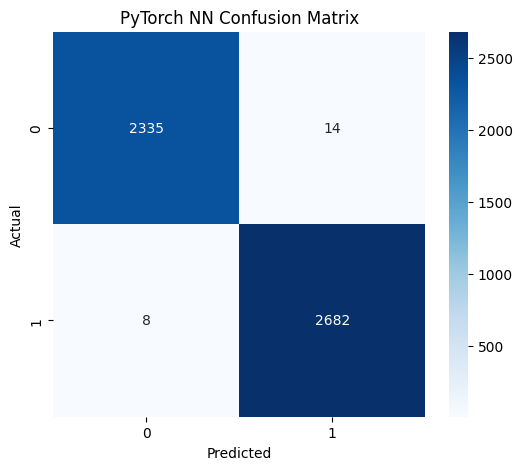

In [60]:
# Get predictions
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test = (y_pred_test > 0.5).float()  # Convert probabilities to binary values

# Convert tensors to NumPy arrays for sklearn evaluation
y_pred_test_np = y_pred_test.numpy()
y_test_np = y_test_tensor.numpy()

# Evaluate performance
accuracy = accuracy_score(y_test_np, y_pred_test_np)
print("Neural Network Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_np, y_pred_test_np))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred_test_np)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("PyTorch NN Confusion Matrix")
plt.show()
